<a href="https://colab.research.google.com/github/VonjiRB/VCF/blob/main/matrix_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! ls

drive  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! ls derive

ls: cannot access 'derive': No such file or directory


In [ ]:
!ls


drive  sample_data


In [ ]:
import pandas as pd
from sklearn import decomposition

In [ ]:
df = pd.read_csv('drive/MyDrive/matrix.csv')
df

,Unnamed: 0,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,...,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,...,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,...,2,0,0,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI


In [ ]:
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True)
df

,Sample,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,...,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,...,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,...,2,0,0,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TSI


In [ ]:
non_snp_columns = ['Population code', 'Sample']

In [ ]:
df_snps = df.drop(non_snp_columns, axis=1)  # wow expl
matrix = df_snps.to_numpy()
print(matrix.shape)
matrix

(1092, 4943)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)

PCA(n_components=2)

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.08253525 0.05412034]
[188.93732058 152.99536559]


In [ ]:
to_plot = pca.transform(matrix)
print(to_plot)

[[ 0.31282717  5.35434923]
 [-0.67940259  6.18332941]
 [-0.42071017  5.26671968]
 ...
 [ 0.20043966  4.43755038]
 [ 0.11973266  4.95993683]
 [-0.28688807  3.46617337]]


In [ ]:
import matplotlib.pyplot as plt


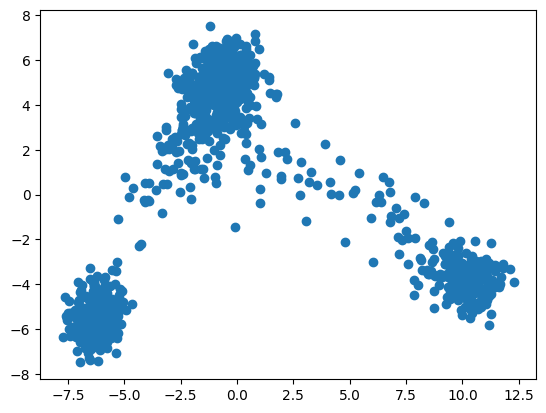

In [ ]:
plt.scatter(x=to_plot[:, 0], y=to_plot[:, 1]) # wow

In [ ]:
import altair as alt

In [ ]:
df_plot = df[non_snp_columns].copy()
df_plot

,Population code,Sample
0,GBR,HG00096
1,GBR,HG00097
2,GBR,HG00099
3,GBR,HG00100
4,GBR,HG00101
...,...,...
1087,TSI,NA20816
1088,TSI,NA20818
1089,TSI,NA20819
1090,TSI,NA20826


In [ ]:
df_plot['PC1'] = to_plot[:, 0]  # Just add PC1 and PC2
df_plot['PC2'] = to_plot[:, 1]
df_plot

,Population code,Sample,PC1,PC2
0,GBR,HG00096,0.312827,5.354349
1,GBR,HG00097,-0.679403,6.183329
2,GBR,HG00099,-0.420710,5.266720
3,GBR,HG00100,-0.805419,5.965095
4,GBR,HG00101,-0.771385,4.332076
...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230
1088,TSI,NA20818,-1.226520,6.273754
1089,TSI,NA20819,0.200440,4.437550
1090,TSI,NA20826,0.119733,4.959937


In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Population code', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)

In [ ]:
pop = pd.read_csv('drive/MyDrive/igsr_populations.tsv', sep='\t')
pop

,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,FIN,FIN,Finnish,Finnish in Finland,60.17000,24.930000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,CHS,CHS,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.78000,106.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,BEB,BEB,Bengali,Bengali in Bangladesh,23.70000,90.350000,SAS,South Asian Ancestry,#c44cfd,5,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,PUR,PUR,Puerto Rican,Puerto Rican in Puerto Rico,18.40000,-66.100000,AMR,American Ancestry,#710027,2,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,KinhSGDP,Kinh,Kinh in Vietnam (SGDP),21.00000,105.900000,NaN,East Asia (SGDP),#ff48de,16,Simons Genome Diversity Project
208,NaN,IranianSGDP,Iranian,Iranian in Iran (SGDP),35.60000,51.500000,NaN,West Eurasia (SGDP),#001f54,19,Simons Genome Diversity Project
209,NaN,ItelmanSGDP,Itelman,Itelman in Russia (SGDP),57.00000,157.000000,NaN,Central Asia and Siberia (SGDP),#01daa0,15,Simons Genome Diversity Project
210,NaN,EsanSGDP,Esan,Esan in Nigeria (SGDP),6.50000,6.000000,NaN,Africa (SGDP),#12eeff,13,Simons Genome Diversity Project


In [ ]:
df_plot = df_plot.merge(pop, on='Population code', how='inner')
df_plot

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1088,TSI,NA20818,-1.226520,6.273754,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1089,TSI,NA20819,0.200440,4.437550,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1090,TSI,NA20826,0.119733,4.959937,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
    fill='Population code'
)

alt.Chart(...)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X = matrix
X_embedded = TSNE(n_components=2, learning_rate='auto',
                 init='random').fit_transform(X)
X_embedded.shape

(1092, 2)

In [ ]:
df_plot['tsne1'] = X_embedded[:,0]
df_plot['tsne2'] = X_embedded[:,1]
df_plot

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections,tsne1,tsne2
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-10.071533,15.498080
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-8.801730,10.561275
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-2.137408,10.120210
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-11.819304,11.069466
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-8.100472,11.341333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-9.216318,1.565522
1088,TSI,NA20818,-1.226520,6.273754,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-8.269952,7.330817
1089,TSI,NA20819,0.200440,4.437550,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-12.369525,4.285061
1090,TSI,NA20826,0.119733,4.959937,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-13.212601,10.264281


In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
)

alt.Chart(...)